# Helpful Links

#### PyTorch
* [API Reference](https://pytorch.org/)
* [pytorch.org Tutorials](https://pytorch.org/tutorials/index.html)
* [GeeksForGeeks Brief Intro](https://www.geeksforgeeks.org/start-learning-pytorch-for-beginners/)
* [learnpytorch.io](https://www.learnpytorch.io/)


# Initial Setup

In [24]:
import numpy as np
import time
import torch
from matplotlib import pyplot as plt
from torch import nn
from tqdm.notebook import tqdm

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Torch Tensors

PyTorch provides many of the same functionalities as NumPy.
The pytorch equivalent to numpy array is the 
[torch tensor](https://pytorch.org/docs/stable/generated/torch.tensor.html)

Let's define a numpy array and torch tensor variant of the following:

$$
A = 
\begin{bmatrix}
1 & 2 \\ 
3 & 4 \\
5 & 6 
\end{bmatrix}

\text{and }

B = 
\begin{bmatrix}
7 & 8  & 9  \\
9 & 10 & 11
\end{bmatrix}
$$

In [2]:
# Define matrix as a list
A = [[1, 2],
     [3, 4],
     [5, 6]]
B = [[7,  8,  9 ],
     [10, 11, 12]]

# Create pytorch variant
A_pt = torch.tensor(A)
B_pt = torch.tensor(B)

# Convert from pytorch to numpy directly
A_np = A_pt.numpy()
B_np = B_pt.numpy()


Let's compare some of the functionality that remains the same between
NumPy and PyTorch

### Prerequisite

We'll be using some built-in functions to evaluate the equivalency
of numpy arrays and torch tensors

The `==` operator when used between tensors or numpy arrays computes
element-wise equivalency

In [3]:
# Example 1: all elements are equal
print(
    torch.tensor([1, 2, 3]) \
    == torch.tensor([1, 2, 3])
)

# Example 2: Some not equal
print(
    torch.tensor([0, 2, 3]) \
    == torch.tensor([1, 2, 3])
)

tensor([True, True, True])
tensor([False,  True,  True])


`torch.all()` checks if all the values of a tensor are True

In [4]:
# example of a true case:
print(
    torch.all(torch.tensor([True, True, True]))
)

# example of a false case
print(
    torch.all(torch.tensor([False, True, True]))
)

tensor(True)
tensor(False)


## Some Examples of Equivalent Functionality

In [5]:
# perform matrix multiplication and compare outputs
print(
    f'matrix multiplications are equivalent: '
    f'{torch.all(A_pt@B_pt == A_np@B_np)}'
)

# compare element-wise addition
print(
    f'element-wise addition/subtraction is equivalent: '
    f'{torch.all(A_pt+A_pt == A_np+A_np)}'
)

# compare the arange functions
print(
    f'torch.arange is equivalent to np.arange: '
    f'{torch.all(torch.arange(10) == np.arange(10))}'
)

# compare transpose functions
print(
    f'A_pt.T is equivalent to A_np.T: '
    f'{torch.all(A_pt.T == A_np.T)}'
)

# compare indexing
rows = [0, 1, 2]
cols = [0, 1, 0]
print(
    f'pytorch indexing is the same as numpy indexing: '
    f'{torch.all(A_pt[rows, cols] == A_np[rows, cols])}'
)

matrix multiplications are equivalent: True
element-wise addition/subtraction is equivalent: True
torch.arange is equivalent to np.arange: True
A_pt.T is equivalent to A_np.T: True
pytorch indexing is the same as numpy indexing: True


# The Differences Between PyTorch and NumPy

While pytorch extends a lot of the functionality of numpy, the advantage
of pytorch can be seen in 3 of its built-in functionalities.

* [GPU Compute Using CUDA](https://pytorch.org/docs/stable/notes/cuda.html)
* [Autograd](https://pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html)
* [A Large Library of Deep Learning Bulding Blocks](https://pytorch.org/tutorials/beginner/nn_tutorial.html)

## GPU Compute Using CUDA

**NOTE**: If you do not have a CUDA capable machine then the following
code will not work unless you change the `device` variable to 
`device='cpu'`. Doing this will not give proper speed measurements but
will allow you to run the code.

GPUs are very good at high-throughput tensor operations. Let's see some
examples.

In [6]:
# set device
device = 'cuda'
#device = 'cpu' # use this if cuda is unavailable

In [7]:
# define a high value of N
N = 1_000_000_000

# define random pytorch tensors
A_pt = torch.randn(N, device=device)
B_pt = torch.randn(N, device=device)

# convert tensors to numpy arrays (converting from gpu requires
# that .cpu() be called on the tensor first
A_np = A_pt.cpu().numpy()
B_np = B_pt.cpu().numpy()

# time a numpy dot product
start = time.time()
A_np@B_np
end = time.time()
time_np = end - start

# time a torch dot product
start = time.time()
A_pt@B_pt
end = time.time()
time_pt = end - start

print(f'numpy speed / torch speed: {time_np / time_pt}')


numpy speed / torch speed: 19.13346999745741


## Speed-up Over NumPy

We measured an up to 200x performance gain from numpy over lists.
Low let's compare the speed up of CUDA accelerated PyTorch over NumPy


  0%|          | 0/50 [00:00<?, ?it/s]

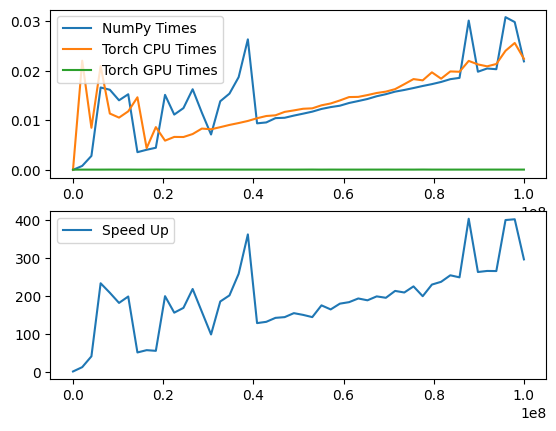

In [15]:
# define number of data points
num_points = 50

# create an array of equidistant N values from 10 to 1,000,000,000
N_vals = np.linspace(
    10, 
    100_000_000, 
    num_points, 
    dtype=np.int32
)

# initialize arrays of times
np_times = np.zeros(num_points)
pt_gpu_times = np.zeros(num_points)
pt_cpu_times = np.zeros(num_points)

# loop over N values
for i, N in tqdm(enumerate(N_vals), total=len(N_vals)):

    # create new arrays of length=N
    A_np = np.random.randn(N)
    B_np = np.random.randn(N)

    # time the numpy dot product
    start = time.time()
    A_np@B_np
    end = time.time()
    np_times[i] = end - start

    # convert arrays to torch tensors
    A_pt_cpu = torch.tensor(A_np)
    B_pt_cpu = torch.tensor(B_np)

    # time the torch cpu dot product
    start = time.time()
    A_pt_cpu@B_pt_cpu
    end = time.time()
    pt_cpu_times[i] = end - start

    # move tensors to device
    A_pt_gpu = A_pt_cpu.to(device)
    B_pt_gpu = B_pt_cpu.to(device)

    # time the torch cpu dot product
    start = time.time()
    A_pt_gpu@B_pt_gpu
    end = time.time()
    pt_gpu_times[i] = end - start


# plot results
fig, ax = plt.subplots(2, 1)

# plot raw times
ax[0].plot(N_vals, np_times, label='NumPy Times')
ax[0].plot(N_vals, pt_cpu_times, label='Torch CPU Times')
ax[0].plot(N_vals, pt_gpu_times, label='Torch GPU Times')
ax[0].legend()

# plot time ratios
ax[1].plot(N_vals, np_times/pt_gpu_times, label='Speed Up')
ax[1].legend()


# Autograd

[Backpropagation](https://en.wikipedia.org/wiki/Backpropagation) is the
engine behind the *learning* in neural network architectures.
During this process, the gradients of our objective functions need to
be computed in order to adjust the model parameters in the direction
that achieves optimality. 

There are many complex functions that are
computed during the forward pass of a neural network and computing those
gradients by hand is cumbersome. 
For that reason, PyTorch (and other deep learning libraries) provide
a system that lets you compute your gradients automatically.

read more [here](https://pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html)

Let's see a small example. 

In [22]:
# define a small value of N for creating tensors
N = 4

# Create a tensor using the `requires_grad=True` argument
params = torch.randn(N, requires_grad=True)
bias = torch.randn(1, requires_grad=True)
print(f'parameters: {params}\n')

# create a data and label pair
x, y = torch.randn(N), torch.tensor(1)

# compute logit
pred = x@params + bias
print(
    f'prediction score: '
    f'{pred}\n'
    f'notice the `grad_fn` field\n'
)

# compute squared loss
loss = (y - pred)**2
print(f'loss: {loss}')

# compute backpropagation to get gradients
loss.backward()
print(f'parameter gradients: {params.grad}\n')
print(f'bias gradient: {bias.grad}')


parameters: tensor([-1.2657, -0.1877, -1.3042, -0.2233], requires_grad=True)

prediction score: tensor([4.4134], grad_fn=<AddBackward0>)
notice the `grad_fn` field

loss: tensor([11.6511], grad_fn=<PowBackward0>)
parameter gradients: tensor([ -5.5945,  -9.5991, -13.5037,   4.0393])

bias gradient: tensor([6.8267])


## Deep Learning Building Blocks

PyTorch comes packed with the tools needed to train and deploy
state-of-the-art neural network architectures.

These include mainly 
[optimizers](https://pytorch.org/docs/stable/optim.html) and
[neural network layers](https://pytorch.org/docs/stable/nn.html) 
but also comes with more advanced features like
[multi-gpu](https://pytorch.org/docs/stable/fsdp.html) training features
and 
[training-time logging](https://pytorch.org/docs/stable/tensorboard.html)

In the next 2 examples, we'll use PyTorch to create the architecture for
a basic 
[multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) 
and then we'll also go to the other extreme and construct the 
$\text{BERT}_{\text{Large}}$ model as described in
[the paper](https://aclanthology.org/N19-1423/)

### Example 1: The Multilayer Perceptron

The MLP on its own is a very powerful nonlinear classification model.
For this code we will create a 2-layer MLP with $500$ neurons and a
*ReLU* activation function

In [44]:
# We'll use this function to count the number of parameters in each 
# model
def count_trainable_params(model: nn.Module) -> int:
    """
    returns the count of learnable parameters in a torch nn.Module

    Input:
    - model[nn.Module]: the model we want the parameter count of

    Output:
    - int: the count of trainable parameters in the model
    """
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [27]:
# Define MLP or 2-Layer NN as a class
class MLP(nn.Module):

    # define the constructor function
    def __init__(
            self, 
            in_features=200,  # number of input features
            hidden_size=500,  # number of hidden neurons
            out_features=10): # number of classes

        # always need to do this for nn.Module classes
        super().__init__()

        # define the first layer of the MLP
        self.layer1 = nn.Linear(in_features, hidden_size)

        # define the activation layer
        self.activation = nn.ReLU()

        # define the output layer
        self.layer2 = nn.Linear(hidden_size, out_features)
    
    # define the function that is used for generating predictions
    def forward(self, X):

        # call forward pass using the first layer
        out = self.layer1(X)
        
        # compute the activations
        out = self.activation(out)

        # compute the logits
        out = self.layer2(out)

        return out


Using this class definition, we can create an MLP object and compute a
forward pass on some data

In [28]:
mlp = MLP(
    in_features=200,
    hidden_size=500,
    out_features=10,
)
print(f'MLP Architecture:\n{mlp}')

# create a dummy sample
x, y = torch.randn(200), 5

# compute forward pass
print(f'forward pass result: {mlp(x)}')

MLP Architecture:
MLP(
  (layer1): Linear(in_features=200, out_features=500, bias=True)
  (activation): ReLU()
  (layer2): Linear(in_features=500, out_features=10, bias=True)
)
forward pass result: tensor([-0.2062, -0.0701,  0.1828,  0.1070,  0.4069,  0.1518, -0.1073, -0.1122,
         0.1836, -0.1497], grad_fn=<ViewBackward0>)


### Example 2: BERT

Now we'll create a relatively more modern architecture as described in 
*BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding*.
Published in NAACL 2019, Devlin et al. released a pretrained transofrmer
model that could be fine-tuned to achieve state-of-the-art results on
several NLP benchmarks.

Let's build this model out in pytorch.

In [62]:
# define BERT model
class BERT(nn.Module):
    def __init__(self,
                 d_model=1024, # model hidden dimensions
                 n_head=16, # number of attention heads
                 n_layers=24, # number of transformer layers
                 n_vocab=30_522, # vocab size
                 seq_len=512, # the maximum sequence length
                 dim_feedforward=4096, # feed forward layers (4x
                 dropout=0.1, # dropout probability
                 layer_norm_eps=1e-05,
                 norm_first=False,
                 bias=True,
                 **kwargs):

        super(BERT, self).__init__()

        # define a single transformer encoder layer
        layer = nn.TransformerEncoderLayer(
            d_model,
            n_head,
            batch_first=True,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            activation='gelu', # BERT paper specifies gelu
            layer_norm_eps=layer_norm_eps,
            norm_first=norm_first,
            bias=bias,
        )

        # create embedding layer for tokens
        self.token_emb = nn.Embedding(
            n_vocab,
            d_model,
        )

        # create learned positional embeddings
        self.position_emb = nn.Parameter(
            torch.rand(seq_len, d_model)
        )

        # create segment embeddings
        self.segment_emb = nn.Embedding(
            2,
            d_model,
        )

        # use single transformer layer to create multiple
        self.transformer = nn.TransformerEncoder(
            layer,
            n_layers,
        )

        # create classifier for Masked Language Modeling objective
        self.mlm_cls = nn.Linear(d_model, n_vocab)

        # create classifier for Next Sentence Prediction objective
        self.nsp_cls = nn.Linear(d_model, 2)

    def forward(self, input_ids, attention_mask, segment_ids=None):
        """
        returns scores for MLM and NSP
        """

        N, S = attention_mask.shape
        pad_mask = ~attention_mask.to(torch.bool)

        # apply embeddings
        scores = self.token_emb(input_ids)
        if segment_ids is None:
            segment_ids = torch.zeros_like(input_ids)
        scores += self.segment_emb(segment_ids)
        scores += self.position_emb[None, :S]

        # pass through transformer
        scores = self.transformer(
            scores, 
            src_key_padding_mask=pad_mask,
        )

        mlm_scores = self.mlm_cls(scores)
        nsp_scores = self.nsp_cls(scores[:, 0, :])

        return mlm_scores, nsp_scores


In [61]:
# Create model and print parameter counts
# NOTE: There is an extra ~20M parameters due to the addition of
#       the mlm_cls and nsp_cls parameters that get tossed after 
#       training
bert = BERT()
print(f'{count_trainable_params(bert):,}')

# create dummy data
tokens = torch.tensor([[1, 2, 3, 4]])
mask = torch.tensor([[1, 1, 1, 1]])

# test a forward pass
mlm_scores, nsp_scores = bert(tokens, mask)
print(
    f'mlm scores: {mlm_scores}\n'
    f'nsp scores: {nsp_scores}'
)

365,377,340
mlm scores: tensor([[[ 0.3407,  0.0252, -0.7845,  ..., -0.1492,  0.6871,  0.5431],
         [ 0.0805, -0.0047, -0.8406,  ..., -0.0069,  0.7734,  0.4840],
         [ 0.2772, -0.0101, -0.7831,  ..., -0.0438,  0.6096,  0.4820],
         [ 0.1742, -0.0216, -0.7619,  ..., -0.2716,  0.8262,  0.5128]]],
       grad_fn=<ViewBackward0>)
nsp scores: tensor([[-0.6861, -0.2319]], grad_fn=<AddmmBackward0>)
